请输入需要打印出的图片数量5
琼


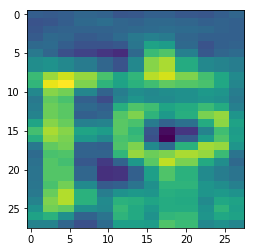

琼


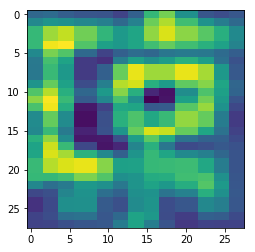

琼


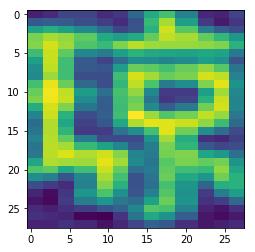

琼


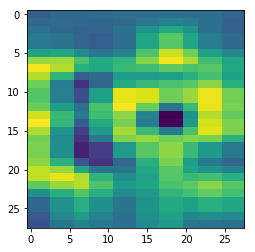

琼


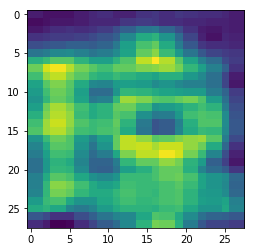

INFO:tensorflow:Error reported to Coordinator: <class 'tensorflow.python.framework.errors_impl.CancelledError'>, Enqueue operation was cancelled
	 [[Node: input_producer/input_producer_EnqueueMany = QueueEnqueueManyV2[Tcomponents=[DT_STRING], timeout_ms=-1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](input_producer, input_producer/RandomShuffle)]]


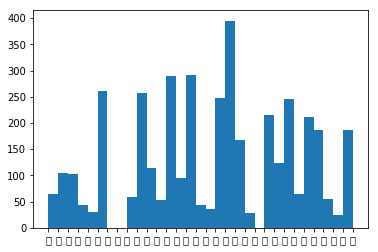

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import tensorflow as tf

num=input('请输入需要打印出的图片数量')
#创建一个字典存储数字所对应的标签
bq = {0: '云',1: '京',2: '冀',3: '吉',4: '宁',5: '川',6: '广',7: '新',8: '晋',9: '桂',10: '沪',11: '津',12: '浙',13: '渝',14: '湘',15: '琼',16: '甘',17: '皖',18: '粤',19: '苏',20: '蒙',21: '藏',22: '豫',23: '贵',24: '赣',25: '辽',26: '鄂',27: '闽',28: '陕',29: '青',30: '鲁',31: '黑'}
#创建一个reader来读取TFRecord文件中的样例并创建输入队列
reader = tf.TFRecordReader()
filename_queue = tf.train.string_input_producer(["/home/srhyme/ML project/Vehicle_License_Plate_Recognition/DS/train.tfrecords"])  
#从文件中读取并解析一个样例  
_, example = reader.read(filename_queue)  
features = tf.parse_single_example(
    example,features={
        'image_raw': tf.FixedLenFeature([], tf.string),  
        'label': tf.FixedLenFeature([], tf.int64),  
    })
#将字符串解析成图像对应的像素数组,其他数据转换成需要的数据类型
images = tf.decode_raw(features['image_raw'], tf.uint8)
labels = tf.cast(features['label'], tf.int32)

label_list=[]
with tf.Session() as sess:  
#启动多线程处理输入数据
    coord = tf.train.Coordinator()  
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
#可视化数据
    for i in range(int(num)):
        image, label = sess.run([images, labels])
        image = np.array(image)
        image.resize((28,28))
        plt.imshow(image)
        print(bq[label])
        pylab.show()
#每类字符的数量与比例并利用图表展示
    for i in range(4000):
        image, label = sess.run([images, labels])
        label_list.append(label)
plt.hist(label_list,list(bq.keys()),histtype='bar',rwidth=None)
plt.xticks(list(bq.keys()), list(bq.values()), rotation=0)
plt.show()